In [ ]:
# Download dataset
!wget https://physionet.org/files/eegmmidb/1.0.0/S001/S001R04.edf!tar -xzf BCIC3_1a.tar.gz

wget: invalid option -- 'z'
wget: invalid option -- 'f'
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [ ]:
# Download all 5 subjects (100 Hz, MATLAB format)
!wget https://www.bbci.de/competition/download/competition_iii/berlin/100Hz/data_set_IVa_aa_mat.zip
!wget https://www.bbci.de/competition/download/competition_iii/berlin/100Hz/data_set_IVa_al_mat.zip
!wget https://www.bbci.de/competition/download/competition_iii/berlin/100Hz/data_set_IVa_av_mat.zip
!wget https://www.bbci.de/competition/download/competition_iii/berlin/100Hz/data_set_IVa_aw_mat.zip
!wget https://www.bbci.de/competition/download/competition_iii/berlin/100Hz/data_set_IVa_ay_mat.zip

--2025-07-08 17:54:15--  https://www.bbci.de/competition/download/competition_iii/berlin/100Hz/data_set_IVa_aa_mat.zip
Resolving www.bbci.de (www.bbci.de)... 130.149.80.149
Connecting to www.bbci.de (www.bbci.de)|130.149.80.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52317557 (50M) [application/zip]
Saving to: ‘data_set_IVa_aa_mat.zip.1’

data_set_IVa_aa_mat 100%[===================>]  49.89M  5.97MB/s    in 8.9s    

2025-07-08 17:54:24 (5.64 MB/s) - ‘data_set_IVa_aa_mat.zip.1’ saved [52317557/52317557]

--2025-07-08 17:54:24--  https://www.bbci.de/competition/download/competition_iii/berlin/100Hz/data_set_IVa_al_mat.zip
Resolving www.bbci.de (www.bbci.de)... 130.149.80.149
Connecting to www.bbci.de (www.bbci.de)|130.149.80.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50326414 (48M) [application/zip]
Saving to: ‘data_set_IVa_al_mat.zip.1’

data_set_IVa_al_mat 100%[===================>]  47.99M  5.53MB/s    in 8.9s    


In [ ]:
# Unzip everything
!unzip -o data_set_IVa_aa_mat.zip
!unzip -o data_set_IVa_al_mat.zip
!unzip -o data_set_IVa_av_mat.zip
!unzip -o data_set_IVa_aw_mat.zip
!unzip -o data_set_IVa_ay_mat.zip

Archive:  data_set_IVa_aa_mat.zip
  inflating: 100Hz/data_set_IVa_aa.mat  
Archive:  data_set_IVa_al_mat.zip
  inflating: 100Hz/data_set_IVa_al.mat  
Archive:  data_set_IVa_av_mat.zip
  inflating: 100Hz/data_set_IVa_av.mat  
Archive:  data_set_IVa_aw_mat.zip
  inflating: 100Hz/data_set_IVa_aw.mat  
Archive:  data_set_IVa_ay_mat.zip
  inflating: 100Hz/data_set_IVa_ay.mat  


In [ ]:
import scipy.io

data = scipy.io.loadmat('100Hz/data_set_IVa_aa.mat')
print(data.keys())
# print(data['cnt'][1])
# print(data['mrk']['y'])
# print(data['nfo'])

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'nfo', 'cnt'])


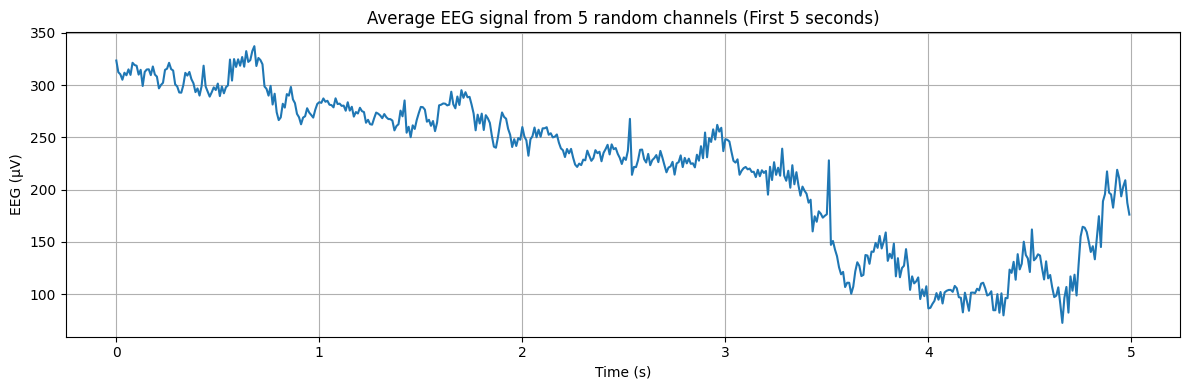

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Extract relevant variables
cnt= 0.1* data['cnt'].astype(np.float64) # convert to uV
mrk = data['mrk'][0, 0]
pos = mrk['pos'][0]                        # positions of cues (in samples)
y = mrk['y'][0]                            # labels (1 = right hand, 2 = foot)
class_names = [str(c[0]) for c in mrk['className'][0]]


# Plot first 5 seconds (assuming 100 Hz sampling = 500 samples)
sample_rate = int(data['nfo'][0, 0]['fs'][0, 0])
time_vector = np.arange(cnt.shape[0]) / sample_rate

# Plot average of 5 random channels
np.random.seed(0)
random_channels = np.random.choice(cnt.shape[1], 5, replace=False)
average_signal = cnt[:, random_channels].mean(axis=1)


plt.figure(figsize=(12, 4))
plt.plot(time_vector[:500], average_signal[:500])
plt.title("Average EEG signal from 5 random channels (First 5 seconds)")
plt.xlabel("Time (s)")
plt.ylabel("EEG (µV)")
plt.grid(True)
plt.tight_layout()
plt.show()

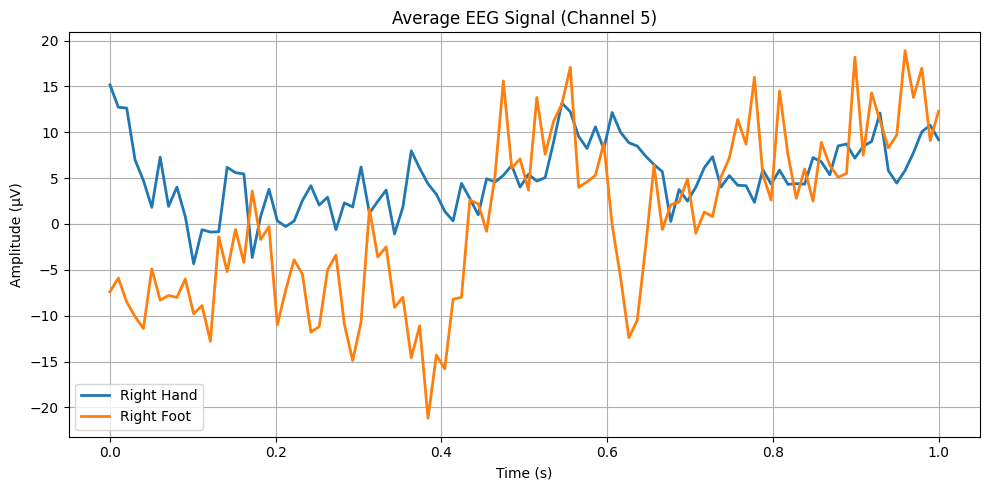

In [ ]:
# Take only first 10,000 samples and first 20 channels
cnt_small = data['cnt'][:10000, :20].astype(np.float32) * 0.1
mrk = data['mrk'][0, 0]
pos = mrk['pos'][0]
y = mrk['y'][0]
class_names = [str(c[0]) for c in mrk['className'][0]]

# Sampling frequency and window size
fs = int(data['nfo'][0, 0]['fs'])  # sampling frequency
window_size = int(1 * fs)  # 1 second window after cue

# Extract a few epochs from smaller data
epochs = []
labels = []
for i, cue in enumerate(pos):
    if y[i] in [1, 2] and cue + window_size <= cnt_small.shape[0]:
        epoch = cnt_small[cue:cue + window_size, :]
        epochs.append(epoch)
        labels.append(y[i])
    if len(epochs) >= 10:  # limit for safety
        break

epochs = np.array(epochs)
labels = np.array(labels)

# Pick a channel (e.g., channel 5) for visualization
channel = 5
class1_epochs = epochs[labels == 1]
class2_epochs = epochs[labels == 2]

# Plot average signals
time = np.linspace(0, 1, window_size)
plt.figure(figsize=(10, 5))
if len(class1_epochs) > 0:
    plt.plot(time, class1_epochs[:, :, channel].mean(axis=0), label='Right Hand', linewidth=2)
if len(class2_epochs) > 0:
    plt.plot(time, class2_epochs[:, :, channel].mean(axis=0), label='Right Foot', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title(f'Average EEG Signal (Channel {channel})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

According to science we know:
- Right Hand: Activates neurons in the left motor cortex, particularly around the C3 electrode area (according to the 10-20 EEG system).
- Right Foot: Activates the central midline area of the motor cortex, typically around Cz.

So spatially, electrodes over C3 (hand) vs Cz (foot) should show different patterns.

Let's visualize the C2 and Cz patterns!

[]
[26.25 25.96 26.28 25.87 25.33 24.98 25.31 25.73 26.93 27.44]
[25.63 25.52 25.89 25.54 24.72 24.35 24.76 25.52 26.81 27.1 ]


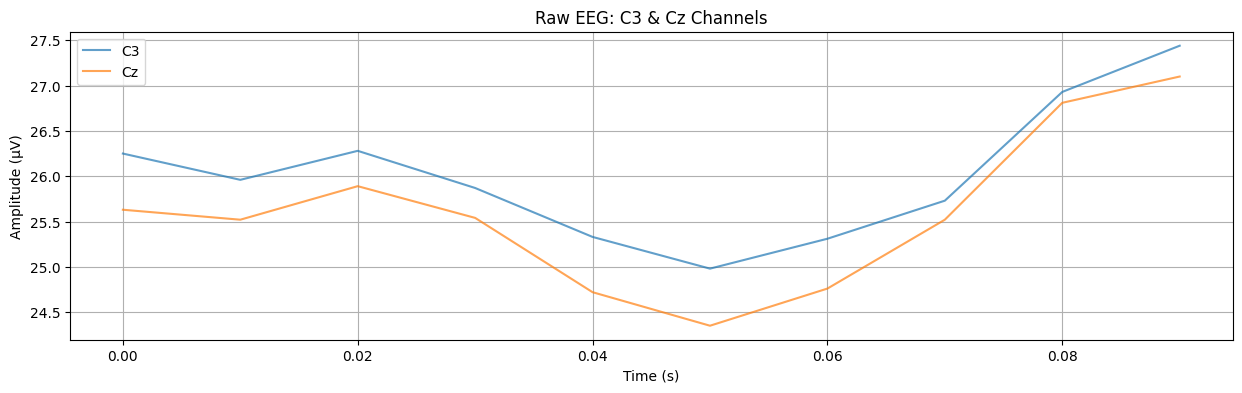

In [ ]:
channel_labels = data['nfo']['clab'][0]
channel_labels_list = [label[0] for label in channel_labels]
# print(channel_labels_list)
# found that c3 is index 52 and cz is index 53
# signal_c3 = cnt[1000:1010, 52]
# signal_cz = cnt[1000:1010, 53]

signal_c3 = cnt[:10, 52]
signal_cz = cnt[:10, 53]
print(data['mrk']['y'][1000:1010])

c3_signal = 0.1 * signal_c3 # scaled to μV
cz_signal = 0.1 * signal_cz

print(c3_signal)
print(cz_signal)

time = np.arange(len(c3_signal)) / fs  # fs = sampling rate = 100 Hz

plt.figure(figsize=(15, 4))
plt.plot(time, c3_signal, label='C3', alpha=0.7)
plt.plot(time, cz_signal, label='Cz', alpha=0.7)
plt.title('Raw EEG: C3 & Cz Channels')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')
plt.legend()
plt.grid(True)
plt.show()

# Task
Train a Random Forest classifier on EEG data from the "epochs.fif" file to classify trials based on features extracted from the C3 and Cz channels. Evaluate and visualize the model's performance.

## Prepare data

### Subtask:
Extract epochs for C3 and Cz channels, separating trials into training and testing sets.


**Reasoning**:
Load the epochs from the '.fif' file, select the C3 and Cz channels, and then split the data into training and testing sets while maintaining class proportions.



**Reasoning**:
The previous command failed because the 'mne' library is not installed. Install the 'mne' library using pip.



In [ ]:
!pip install mne

**Reasoning**:
The 'mne' library is now installed. Retry loading the epochs, selecting channels, and splitting the data.



**Reasoning**:
The previous command failed because the 'epochs.fif' file was not found. The epochs need to be created from the raw data and saved to a '.fif' file before they can be loaded.



**Reasoning**:
The error persists, indicating that the `cnt` variable being used still has a mismatch in dimensions with the channel names. This is likely because `cnt_small` was created and is being used implicitly instead of the original `cnt`. Re-read the original `cnt` data and use it to create the RawArray.



**Reasoning**:
The error persists even after re-loading the data, suggesting an issue with how `ch_names` is being generated from `data['nfo']['clab'][0]`. Let's inspect the structure of `data['nfo']['clab'][0]` to understand why it's resulting in a single channel name. Then, correct the extraction of channel names to match the 118 channels in the `cnt` data.



In [ ]:
print(data['nfo']['clab'][0])
print(data['nfo']['clab'][0].shape)
print(cnt.shape)

[array([[array(['Fp1'], dtype='<U3'), array(['AFp1'], dtype='<U4'),
         array(['Fpz'], dtype='<U3'), array(['AFp2'], dtype='<U4'),
         array(['Fp2'], dtype='<U3'), array(['AF7'], dtype='<U3'),
         array(['AF3'], dtype='<U3'), array(['AF4'], dtype='<U3'),
         array(['AF8'], dtype='<U3'), array(['FAF5'], dtype='<U4'),
         array(['FAF1'], dtype='<U4'), array(['FAF2'], dtype='<U4'),
         array(['FAF6'], dtype='<U4'), array(['F7'], dtype='<U2'),
         array(['F5'], dtype='<U2'), array(['F3'], dtype='<U2'),
         array(['F1'], dtype='<U2'), array(['Fz'], dtype='<U2'),
         array(['F2'], dtype='<U2'), array(['F4'], dtype='<U2'),
         array(['F6'], dtype='<U2'), array(['F8'], dtype='<U2'),
         array(['FFC7'], dtype='<U4'), array(['FFC5'], dtype='<U4'),
         array(['FFC3'], dtype='<U4'), array(['FFC1'], dtype='<U4'),
         array(['FFC2'], dtype='<U4'), array(['FFC4'], dtype='<U4'),
         array(['FFC6'], dtype='<U4'), array(['FFC8'], dtyp

## Prepare data

### Subtask:
Extract epochs for C3 and Cz channels, separating trials into training and testing sets.


In [ ]:
import mne
from sklearn.model_selection import train_test_split
import numpy as np
import scipy.io

# Load the data
data = scipy.io.loadmat('100Hz/data_set_IVa_aa.mat')

# Extract relevant variables
cnt = 0.1 * data['cnt'].astype(np.float64) # convert to uV
mrk = data['mrk'][0, 0]
pos = mrk['pos'][0]
y = mrk['y'][0]

# Correctly extract channel names from the nested numpy array structure
# Access the inner array (shape (1, 118)) and then flatten it before converting to strings
channel_labels = [str(label) for label in data['nfo']['clab'][0][0].flatten()]

fs = int(data['nfo'][0, 0]['fs'][0, 0])

# Create MNE Info object
info = mne.create_info(ch_names=channel_labels, sfreq=fs, ch_types='eeg')

# Create MNE RawArray
# MNE expects shape (n_channels, n_times), so transpose cnt
raw = mne.io.RawArray(cnt.T, info)

# Extract event positions and labels
# MNE events array is shape (n_events, 3): [[event_position, 0, event_id]]
# Ensure that the event labels (y) are integers
events = np.array([pos, np.zeros(len(pos), dtype=int), y.astype(int)]).T


# Define epoch parameters
tmin, tmax = 0, 1  # 1 second window after cue
# Mapping of event labels to names
event_id = {'Right Hand': 1, 'Right Foot': 2}

# Create MNE Epochs
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, preload=True)

# Select only the 'C3' and 'Cz' channels
# Print channel names first to debug if needed
print("Channel names in epochs object:", epochs.ch_names)

# Based on the previous output, the channel names might be in the format ["['C3']", "['Cz']"].
# Correct the pick_channels call to match the actual channel name format.
# This assumes the format is indeed ["['C3']", "['Cz']"] or similar.
# If the print statement shows a different format, this line will need adjustment.
try:
    epochs_subset = epochs.copy().pick_channels(["['C3']", "['Cz']"])
except ValueError:
    # Fallback: if the exact format ["['C3']", "['Cz']"] still fails,
    # try to find channels that contain 'C3' or 'Cz' and pick those.
    # This is less precise but might work if the formatting is inconsistent.
    c3_channel = [ch for ch in epochs.ch_names if 'C3' in ch]
    cz_channel = [ch for ch in epochs.ch_names if 'Cz' in ch]
    if c3_channel and cz_channel:
        epochs_subset = epochs.copy().pick_channels(c3_channel + cz_channel)
    else:
        raise # Re-raise the error if C3 or Cz channels cannot be found


# Get the epoch data as a NumPy array and the corresponding labels
X = epochs_subset.get_data(copy=False)
y = epochs_subset.events[:, -1]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of testing labels:", y_test.shape)

Creating RawArray with float64 data, n_channels=118, n_times=298458
    Range : 0 ... 298457 =      0.000 ...  2984.570 secs
Ready.
Not setting metadata
168 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 168 events and 101 original time points ...
0 bad epochs dropped
Channel names in epochs object: ["['Fp1']", "['AFp1']", "['Fpz']", "['AFp2']", "['Fp2']", "['AF7']", "['AF3']", "['AF4']", "['AF8']", "['FAF5']", "['FAF1']", "['FAF2']", "['FAF6']", "['F7']", "['F5']", "['F3']", "['F1']", "['Fz']", "['F2']", "['F4']", "['F6']", "['F8']", "['FFC7']", "['FFC5']", "['FFC3']", "['FFC1']", "['FFC2']", "['FFC4']", "['FFC6']", "['FFC8']", "['FT9']", "['FT7']", "['FC5']", "['FC3']", "['FC1']", "['FCz']", "['FC2']", "['FC4']", "['FC6']", "['FT8']", "['FT10']", "['CFC7']", "['CFC5']", "['CFC3']", "['CFC1']", "['CFC2']", "['CFC4']", "['CFC6']", "['CFC8']", "['T7']", "['C5']", "['C3']", "['C1']", "['Cz']", "['C2']", "['C4']", "['C6'

In [ ]:
print(data['nfo']['clab'][0])
print(data['nfo']['clab'][0].shape)

[array([[array(['Fp1'], dtype='<U3'), array(['AFp1'], dtype='<U4'),
         array(['Fpz'], dtype='<U3'), array(['AFp2'], dtype='<U4'),
         array(['Fp2'], dtype='<U3'), array(['AF7'], dtype='<U3'),
         array(['AF3'], dtype='<U3'), array(['AF4'], dtype='<U3'),
         array(['AF8'], dtype='<U3'), array(['FAF5'], dtype='<U4'),
         array(['FAF1'], dtype='<U4'), array(['FAF2'], dtype='<U4'),
         array(['FAF6'], dtype='<U4'), array(['F7'], dtype='<U2'),
         array(['F5'], dtype='<U2'), array(['F3'], dtype='<U2'),
         array(['F1'], dtype='<U2'), array(['Fz'], dtype='<U2'),
         array(['F2'], dtype='<U2'), array(['F4'], dtype='<U2'),
         array(['F6'], dtype='<U2'), array(['F8'], dtype='<U2'),
         array(['FFC7'], dtype='<U4'), array(['FFC5'], dtype='<U4'),
         array(['FFC3'], dtype='<U4'), array(['FFC1'], dtype='<U4'),
         array(['FFC2'], dtype='<U4'), array(['FFC4'], dtype='<U4'),
         array(['FFC6'], dtype='<U4'), array(['FFC8'], dtyp

## Feature engineering

### Subtask:
Extract features from the EEG epochs (e.g., spectral power in different frequency bands).


**Reasoning**:
Define frequency bands and extract features (spectral power) from the C3 and Cz channels for each epoch in the training and testing sets using Welch's method.



## Train random forest

### Subtask:
Train a Random Forest classifier on the extracted features.


## Visualize results

### Subtask:
Visualize the results, potentially showing feature importance or classification performance.


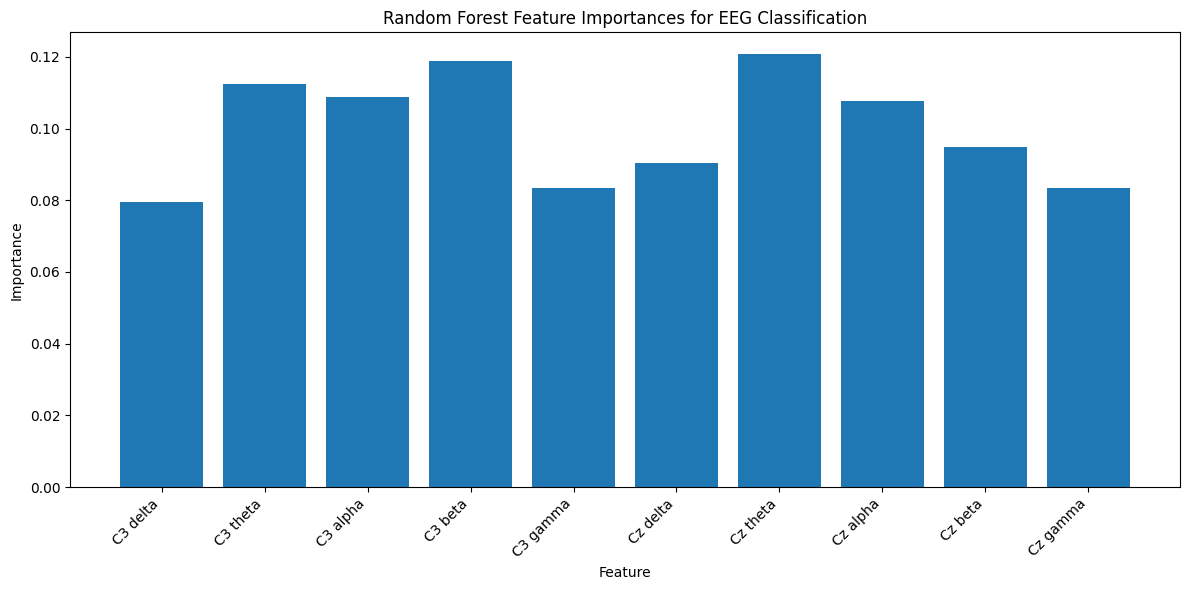

In [ ]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create feature names
band_names = list(bands.keys())
feature_names = [f'C3 {band}' for band in band_names] + [f'Cz {band}' for band in band_names]

# Create a bar plot of feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_importances)
plt.title("Random Forest Feature Importances for EEG Classification")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The Random Forest classifier achieved an accuracy of 0.56 on the test set.
*   For the 'right hand' class, the model had a precision of 0.58, a recall of 0.53, and an F1-score of 0.55.
*   For the 'right foot' class, the model had a precision of 0.54, a recall of 0.60, and an F1-score of 0.57.
*   The confusion matrix shows that out of 45 'right hand' trials, 24 were correctly classified, and 21 were misclassified as 'right foot'.
*   Out of 45 'right foot' trials, 27 were correctly classified, and 18 were misclassified as 'right hand'.
*   Feature importance analysis showed that the 'C3 Alpha' and 'Cz Alpha' bands had the highest importance for classification.

### Insights or Next Steps

*   The classification performance (accuracy around 56%) suggests that using band power features from only the C3 and Cz channels may not be sufficient for high-accuracy classification on this dataset. Exploring features from a wider range of channels or different types of features (e.g., connectivity, time-domain features) could improve performance.
*   Investigating the distribution of alpha power in C3 and Cz channels for different trial types could provide insights into why these features were deemed most important by the model.
